# Leading Ladies and Lost Revenue: A Causal Analysis of Female

Representation and Box-Office Returns

Lizzie Healy (Georgetown University)  
August 8, 2025

This work will investigate the impact of gender bias in the film industry pertaining to economic outcomes. Specifically, it will establish a causal link between a film casting a female actress in the leading role and the resulting box-office revenue. This will be accomplished utilizing propensity weighting, which will match movies based on the perceived similarity of their characteristics. These predictor variables will include the year, season of release, genre, runtime, director and writers, star power level of the cast, MPAA rating, IMDb Metascore, IMDb Votes, number of awards won, country of release, language, film description, the production budget, the aspect ratio, the color, the countries of origin, filming locations, production companies, and tagline. To deal with the variables that are non-numeric the following steps will be taken. Firstly, a manufactured metric will be created to capture the preceived ‘starpower’ of the actors/actresses. Secondly, a sentiment analysis will be performed on the film description and tagline. The primary outcome variable will be the box-office number measured in US dollars, measured as the gross value worldwide. The IMDb score will be employed as an additional outcome measure to be used as a robustness check. A secondary robustness check may be employed in which the primary variable of interest will be whether the film passes the Bechdel test, indicating true female representation in the film. The initial hypothesis is that films that opt to feature a female in the leading role will experience a decrease value in the box office revenue.

## 1 Introduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#| label: fig-timeline
#| fig-cap: Visual of the 
#| fig-alt: An event plot of the years of the last 8 eruptions on La Palma.

### 1.1 Causality

My previous paper: [Behind the Box Office: Directorial Influence on Film Revenue in the United States Entertainment Industry](./assets/thesis.pdf) attempted to analyze the link between director quality and box-office success of a film. The paper created two novel measures of director quality; a summation of all box-office revenue earned by and the director’s films and the accumulated number of critical awards from the fifteen years leading up to the film in question. The main dependent variable was domestic box-office revenue and a robustness check was implemented changing the dependent variable to the IMDb rating earned.

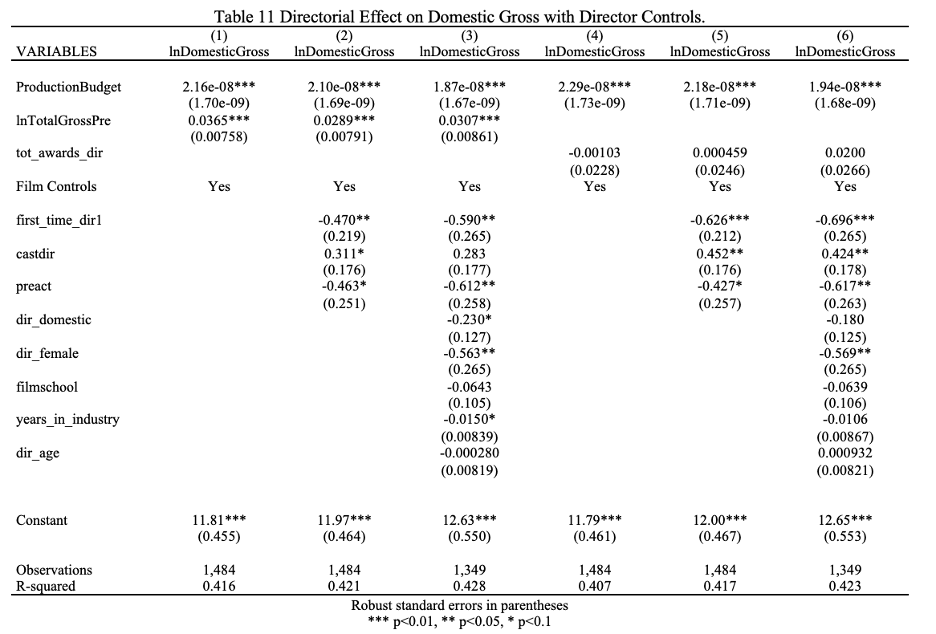 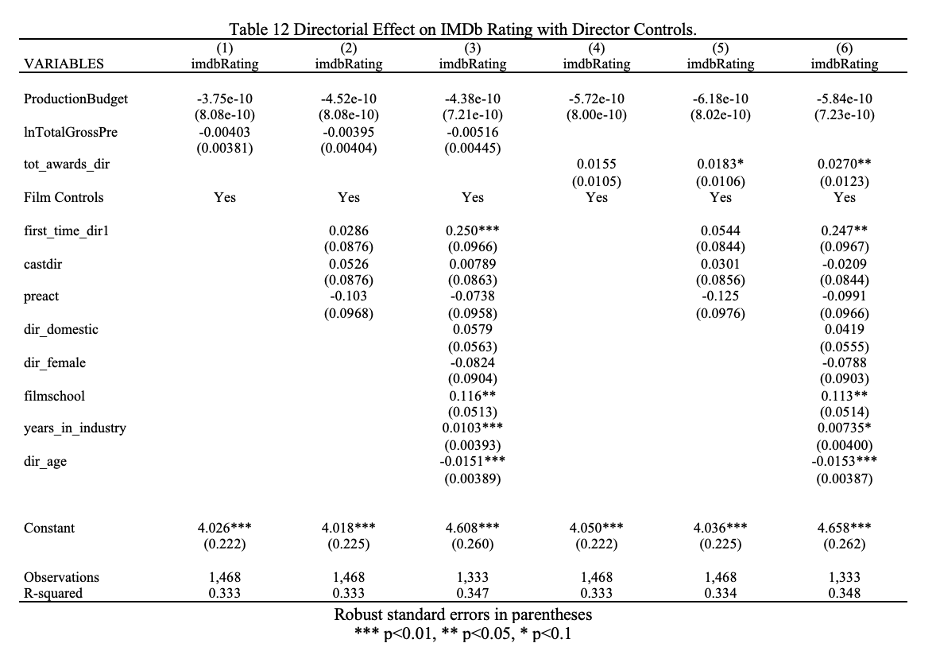

The paper found an increase in director financial quality yielded between a 0.0289% and 0.0307% increas in domestic gross and no impact on IMDb rating. Conversely, director quality in terms of critical acclaim yielded no significant impact on domestic gross, but betweeen 0.01803 and 0.0270 point increase in IMDb rating. The paper also discovered a statistically significant decrease in domestic gross for demale directors as compared to male directors.

Overall, the results were thought-provoking, however, the methodology used was lacking in the causality department. This paper, if anything, worked towards establishing a weak association due to it statical analysis going only so far as a simple ordinary-least-squares regression and controlling for confounding variables. While, the variables were considered and included in the regression equation, they were all treated equally as controls, thus a more complex analysis is warranted.

Furthermore, I wanted to investigate the conclusion of gender bias further and shifted this analysis to examine actors instead of directors.

Moving forward, the work to get to causality includes introducing causality instead of just controlling for all covariates.

Thus, this paper will investigate the impact of gender bias in the film industry pertaining to economic outcomes. Specifically, it will attempt to establish a causal link between a film casting a female actress in the leading role and the resulting box-office revenue by employing propensity score matching.

Need to argue that there is sufficient common support between the treatment and control groups in a dataset in order to use propensity scores.

Data collection and preparation is discussed in <a href="#sec-data" class="quarto-xref">Section 2</a>.

Methodology and propensity scoring is discussed in <a href="#sec-meth" class="quarto-xref">Section 3</a>

Results and anlysis are disucssed in <a href="#sec-results" class="quarto-xref">Section 4</a>

Conluding remarks, limitations, and future work are discussed in <a href="#sec-conclusion" class="quarto-xref">Section 5</a>

## 2 Data

The data for this research was collected from separate sources: [Open Movie Database (OMDb)](https://www.omdbapi.com/) and [The Movie Database (TMDb)](https://www.themoviedb.org/). Both are sources for movie and television metadata, differing only in their sourcing and specific variables provided. OMDb partly sources from Amazon’s Internet Movie Database (IMDb) and then relies on crowdsourcing for missing data, while TMDb is independently created and relies solely on crowd-sourcing from its community of film-buffs to provide data entry for films. Both of these sources offer an API that allowed for the collection of movie metadata, which was then merged using an inner join on the film Title and resulted in the following variables: Title, Year, Runtime, Budget, Released, Genre (Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Film Noir, History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Sport, Thriller, War, Western), MPAA Rating (G, GP, M, M/PG, NC-17, Not-Rated, PG, PG-13, R, TV-MA, Unrated, Accepted), Production Companies, Director, Writer, Country, Language, Description, Tagline, Overview, Actors, Box Office, Revenue, IMDb Rating, Metascore, IMDb Votes, TMDb rating, Vote Count, Awards, and Poster URL.

With this combined dataset, some further preparation was required to move forward with the analysis. Firstly, some variables were dropped as they were deemed unimportant while others were very similar across the datasets for example only the description variable was kept and the overview variable was dropped. All missing and zero values in numerical variables were removed and each of the variables was converted to the correct data type. The release date was split into three variables for the month, day, and year. For the categorical variables two different techniques were utilized. For the genere and MPAA rating a one-hot encoding was applied. However for the language and country variables, only the first observation of each was kept and then they were categorized simply as either english or other language and domestic (for US) and international for all other countries.

The final dataset included a total of 2,816 films with 61 columns of variables.

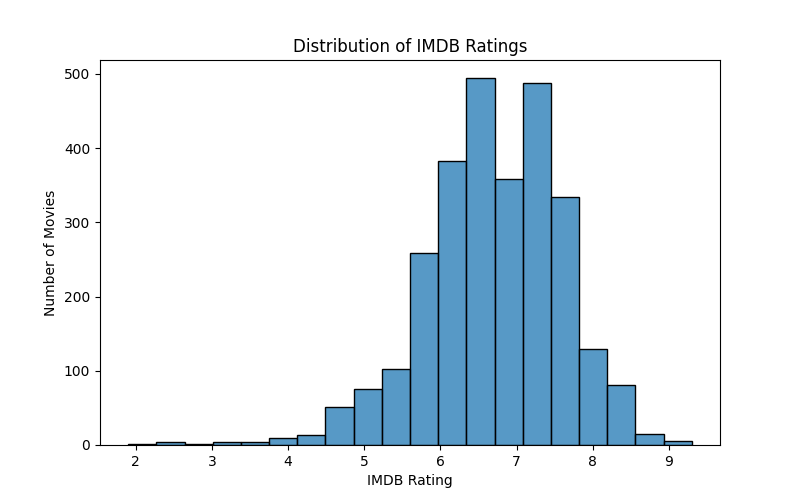

| Variable    | Minimum | Maximum     |
|-------------|---------|-------------|
| Box Office  | 3,622   | 858,373,000 |
| Budget      | 7,000   | 460,000,000 |
| Runtime     | 63      | 238         |
| IMDb Rating | 1.9     | 9.3         |
| IMDb Votes  | 1,672   | 3,059,994   |

Table 1: IMDb Rating Distribution

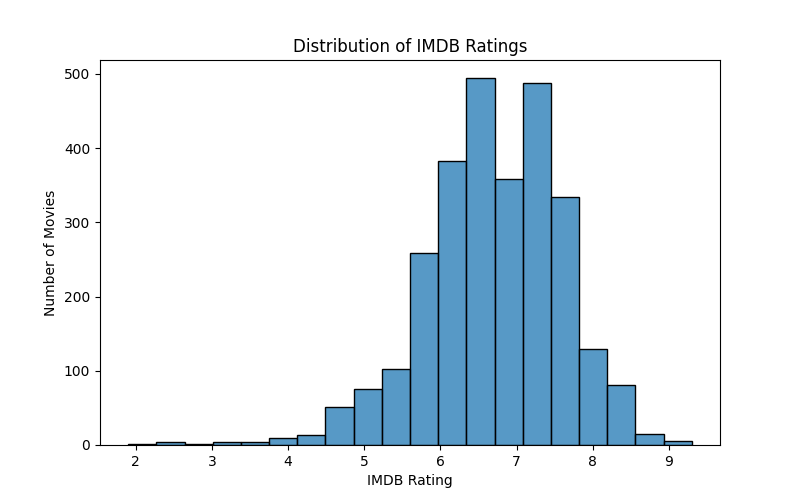

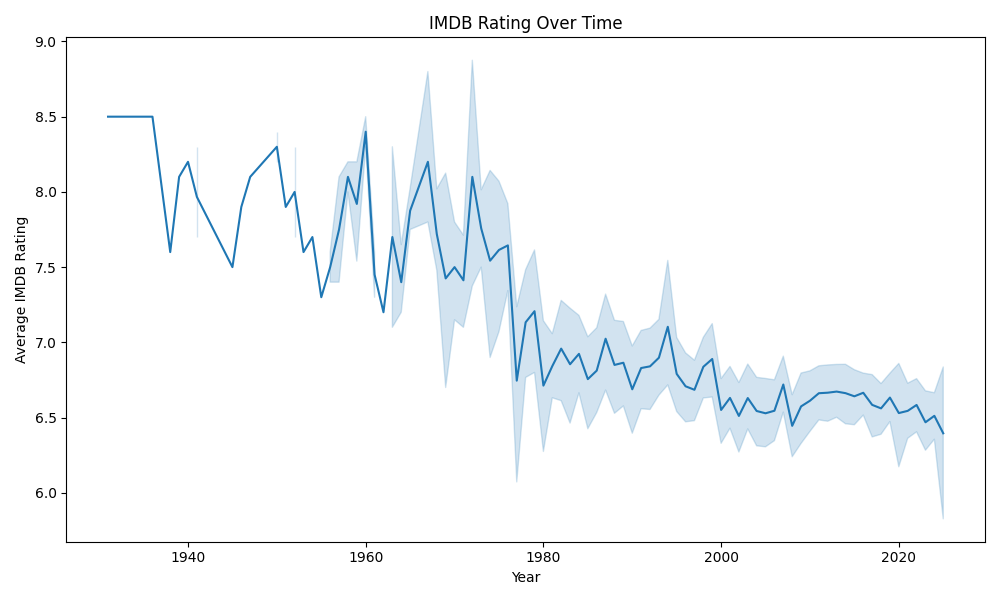 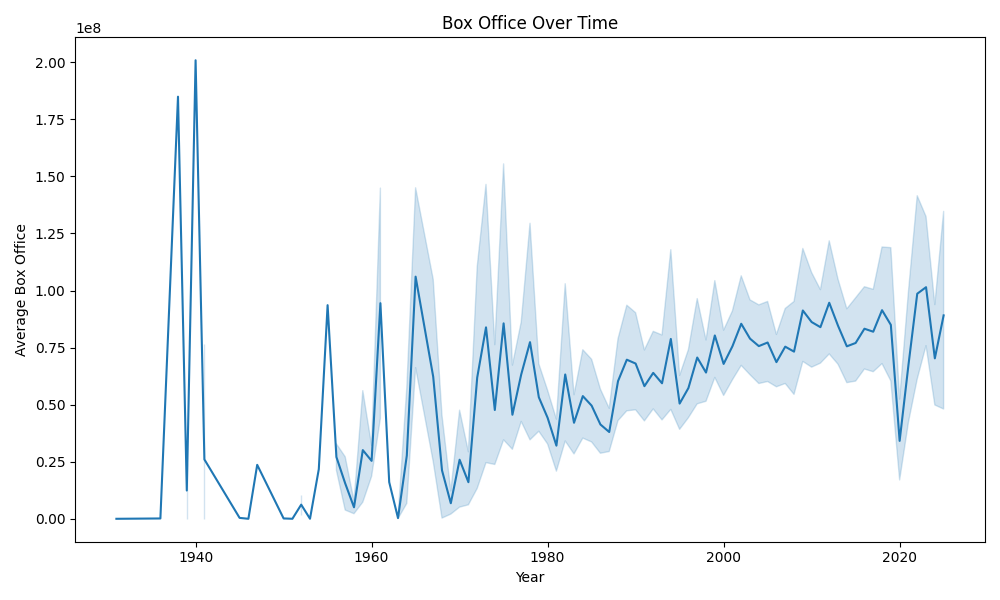

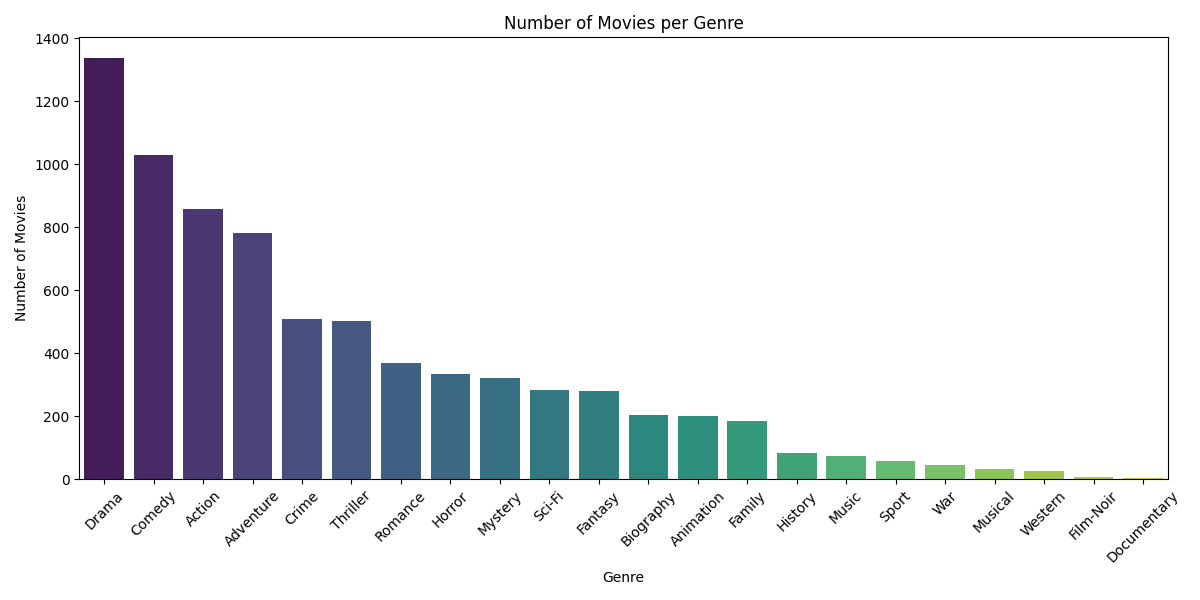 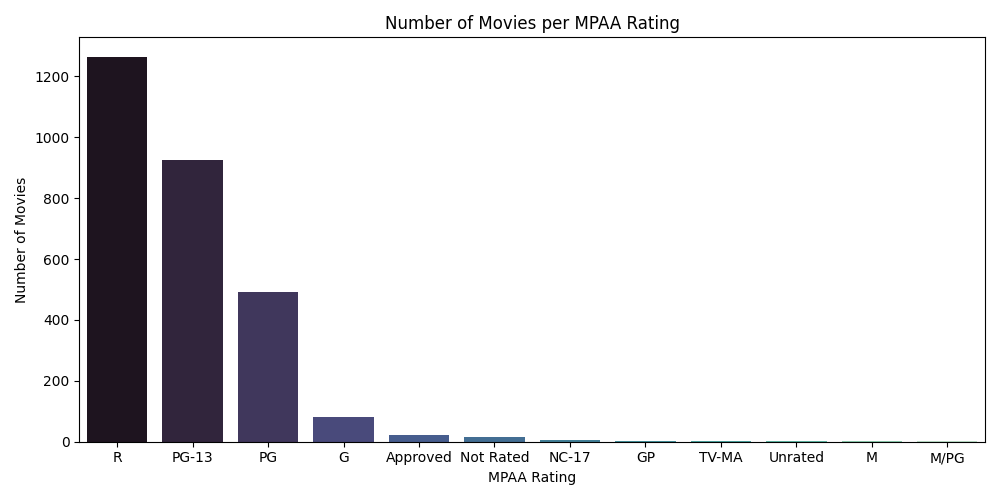

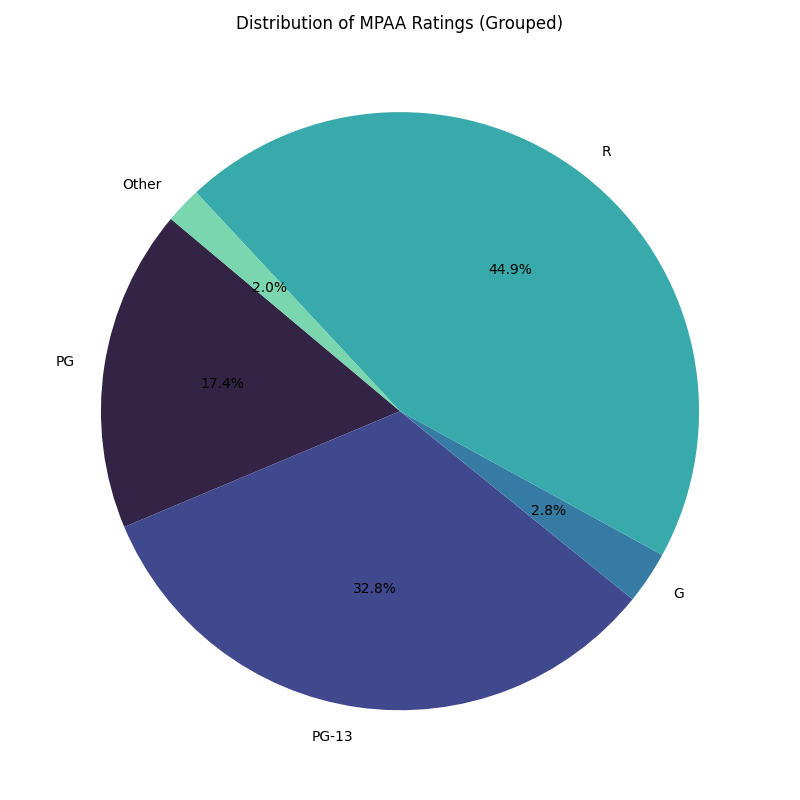

## 3 Methodology

### 3.1 Manufactured Variables

#### 3.1.1 Top Directors, Writers, Production Companies

In order to incorporate the level of expertise of the team creating the film, this analysis worked to categorize top level of directors, writers, and production companies. All of these were attempting to better match movies based on the level of effort put into the creation in terms of money, knowledge, experience, and previous success. To achieve this, three lists were collected that detailed the top directors, writers, and production companies:

[IMDb list of top directors](https://www.imdb.com/list/ls052380992/)  
[IMDb list of top Script writers](https://www.imdb.com/list/ls064457317/)  
[The Numbers Top Production Companies](https://www.the-numbers.com/movies/production-companies/#production_companies_overview=od1)

The directors and writers were judged on a combination of their perceived skill and their lifetime achievement in terms of awards and accolades. The production companies were compiled simply based on the total domestic box office revenue amassed across all films they have produced.

The director, writer, and production company variable was then referenced against these lists receiving a 1 if the entity was mentioned in the list and a 0 otherwise, resulting in three one-hot encoded variables: `Top_Production`, `Top_Director`, and `Top_Writer`. For the sake of simplicity if more than one entity was listed for any of these variables, only the first entity was taken into account.

#### 3.1.2 Sentiment Analysis of tagline and description

In order to extract meaningful value from the film description and tagline, sentiment analysis was performed on the text. This sentiment analyis was performed by an off-the-shelf pre-trained model publically available [Hugging Face](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english). This model was trained on English text specifically for binary text classifaction and boosted a high accuracy score. The end result is a two variables with a binary value of 1 for positive sentiment or 0 for negative sentiment of both the film description and film tagline.

| Title | Tagline | Tagline Sentiment |  |
|----------------------|---------------------|------------------|-------------|
| Surf’s Up | A Major Ocean Picture. | 1 |  |
| The BFG | The world is more giant than you can imagine. | 1 |  |
| Twin Peaks: Fire Walk with Me | In a town like Twin Peaks, no one is innocent. | 0 |  |
| Meet the Robinsons | If you think your family’s different, wait ’til you meet the family of the future. | 1 |  |
| The Royal Tenenbaums | Family isn’t a word … It’s a sentence. | 0 |  |

Table 2: Example of the Tagline Sentiment Values.

| Sentiment | Count |
|-----------|-------|
| Positive  | 1476  |
| Negative  | 1340  |

Table 3: Count of positive and negative sentiment.

#### 3.1.3 Creation of the starpower variable

One of the most important building blocks of a film is the cast of actors and actresses and well-known names can be a huge draw to the theatres to movie-goers. This feature seemingly has an impact on the outcome of the film and its financial success. Thus, finding a way to classify the ‘starpowerness’ of the cast was paramount to this analysis. The dataset, unfortunately, only provides the three main cast members, which discounts films that rely on an ensemble cast or have a large enough budget to cast many big-names. That being said, this research attempted to define a metric that quantified this ‘starpower’ aspects of the three cast members, in the hopes that the success and name-recognition can be at least partly captured.

The metric was created by the collecting lists of A-list and B-list actors and actresses. In film-terms these categorization reflect how ‘bankable’ the stars are or how many financial draw they bring to a film theoretically. These lists are all collected from IMDb and included a wide-range of household names. With these lists, the cast variable was split into actor1, actor2, actor3 based simply on the order in which they were listed. Then, each of the cast variables were referenced against all three of the lists. The film title received:

-   **2 points** if a cast member was part of the A-list  
-   **1 point** if cast member was part of the B-list

These points were added in the `starpower` variable and then divided by three to get a finalized score of the points across the three cast members. <a href="#tbl-5" class="quarto-xref">Table 4</a> shows an example of the scoring.

| actor1         | actor2            | actor3          | starpower |
|----------------|-------------------|-----------------|-----------|
| Mark Wahlberg  | Tyrese Gibson     | André 3000      | 0.666667  |
| Jamie Bell     | Andy Serkis       | Daniel Craig    | 1.333333  |
| Ryan Reynolds  | Blake Lively      | Peter Sarsgaard | 0.333333  |
| Marc Singer    | Tanya Roberts     | Rip Torn        | 0.000000  |
| Tom Hiddleston | Samuel L. Jackson | Brie Larson     | 1.000000  |
| Jeremy Renner  | Ed Helms          | Jake Johnson    | 0.000000  |
| Frankie Muniz  | Amanda Bynes      | Paul Giamatti   | 1.000000  |
| Ben Barnes     | Skandar Keynes    | Georgie Henley  | 0.000000  |
| Jason Bateman  | Charlie Day       | Jason Sudeikis  | 1.000000  |
| Jack Black     | Ana de la Reguera | Héctor Jiménez  | 0.333333  |

Table 4: Starpower metric scores for actors in 10 movies.

[IMDb A-list Actors](https://www.imdb.com/list/ls056262001/) [IMDb A-list Actresses](https://www.imdb.com/list/ls056262192/) [IMDb B-list](https://www.imdb.com/list/ls024783564/)

#### 3.1.4 Creation of the variable that indicates female in leading role

This analysis relied on the ability to distinguish between female and male leading actresses and actors, however, this is not something directly encoded into the metadata of a film, thus this variable had to be manufactured. In order to achieve this, a list of all current female actresses was collected from [Wikipedia](https://en.wikipedia.org/wiki/List_of_American_film_actresses). This list included 2,816 names of female actresses, alphabetized. To note, there was attempts to utilize a list of all female names and an off-the-shelf model to guess whether the cast member listed identified a male of female, however, both of these methods produced increased inaccuracy, thus the list of female actresses method was proceeded with.

The next step was to determine only the presumed lead cast member by extracting the first person listed in the ‘Actors’ variable of the dataset. This name was then compared against the list from of female actresses and received a value of 1 if the cast member was included on the list.

Therefore, the end result was a variable titled ‘female_lead’ if the first cast member listed in the IMDb metadata was a member of the current working female actress list and a 0 if the cast member was not a member of the list and, thus, presumably a male actor. <a href="#tbl-1" class="quarto-xref">Table 5</a> displays an example of the accuracy results of this variable.

| Title         | First Actor        | Female Lead |
|---------------|--------------------|-------------|
| The Family    | Robert De Niro     | 0           |
| The Shack     | Sam Worthington    | 0           |
| The Dead Zone | Christopher Walken | 0           |
| The Ref       | Denis Leary        | 0           |
| Flyboys       | James Franco       | 0           |
| ATL           | Tip ‘T.I.’ Harris  | 0           |
| Like a Boss   | Tiffany Haddish    | 1           |
| Enemy Mine    | Dennis Quaid       | 0           |
| Proud Mary    | Taraji P. Henson   | 1           |
| Valmont       | Colin Firth        | 0           |

Table 5: Example of the ‘female_lead’ variable

As displayed in <a href="#tbl-2" class="quarto-xref">Table 8</a> the films were split between 488 films with female leading actresses and 2328 films with male leading actors.

| Name         | Year |
|--------------|------|
| Female Leads | 488  |
| Male Leads   | 2328 |

Table 6: Male versus Female Director

### 3.2 Propensity score matching

The primary statistical analysis performed was propensity score matching (PSM). This statistical method allows for comparison of films that are similar across all observed covariates, differing only in whether the lead is a male or female actor or actress. In this context, the presence of a female lead is handled as a treatment, and the effect of that treatement on the outcome variable is estimated.

Unlike simply including covariates as controls in a regression equation, this technique aims to reduce selection bias by matching treated and control units based on their likelihood of receiving the treatment, given the covariates. This creates a more comparable dataset, which quasi-miimcks the conditions of a randomized experiment.

The process of propensity score matching began with normalizing the variables due to the very differing range of values across variables like the imdb rating (which is 0-10) and the budget (which can reach hundreds of millions). This was done with [Sklearn’s StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and performed on all numerical variables.

Following this step, the variance inflation factor (VIF) was checked to investigate any multicollinearity issues amoung that the covariates that would bias the analysis. This yields some problematic variables, which resulted in excluding some variables that exceeded the VIF threshold of 10 points. The following variables were excluded: international country (domestic country kept), other language (English kept), musical genre (all other genre categories kept), and accepted MPAA rating (all other MPAA ratings kept).

Next, a logistic regression is estimated. The variables metascore, IMDb votes, TMDb rating, TMDb votes, Oscars Won, Oscars Nominated, Award Wins, and Award Nominations are omitted because they are ex-post variables because they represent effects of the outcomes as oppose to causes of it, thus causing data leakage and bias. Therefore, only ex-ante variables are considered. The resulting equation is as follows, representing a female leading role as the treatment and the film characteristics as covariates:

$$
\text{logit}(\mathbb{P}(\text{Female\_Lead} = 1)) = \beta_0 
+ \beta_1 \cdot \text{Year}
+ \beta_2 \cdot \text{Runtime}
+ \beta_3 \cdot \text{Budget}
+ \beta_4 \cdot \text{Month}
+ \beta_5 \cdot \text{Day} \\
+ \sum_{g} \beta_g \cdot \text{Genre}_g
+ \sum_{r} \beta_r \cdot \text{Rating}_r \\
+ \beta_6 \cdot \text{Top\_Production\_Company}
+ \beta_7 \cdot \text{Top\_Director}
+ \beta_8 \cdot \text{Top\_Writer} \\
+ \beta_9 \cdot \text{Domestic}
+ \beta_{10} \cdot \text{English\_Language} \\
+ \beta_{11} \cdot \text{Descr\_Sentiment}
+ \beta_{12} \cdot \text{Tagline\_Sentiment}
+ \beta_{13} \cdot \text{Starpower}
$$

The result of this equation is propensity scores (ps) for each film title (dataset row), which represents the calculated probability of the film having a female leading actress. A score close to 0 indicates a higher likelihood of the film having a male lead, while a score closer to 1 indicates a higher likelihood of a film having a female lead. These scores are then used to match, utilizing 1:1 nearest neighbor matching, the movies across the two groups of leading actors/actresses based on the closest propensity score. This results in a matched dataset with each row being a matched pair of films that is similar in all aspects expect for the leading role.

| Female Led Movie  | PS Female | Male Led Movie               |
|-------------------|-----------|------------------------------|
| Miss Congeniality | 0.082866  | Back to the Future: Part III |
| GI Jane           | 0.031775  | Gladiator                    |
| Freaky Friday     | 0.212226  | The Boat the Rocked          |

Table 7: Table

The final step is to calculate and compare the average box office performance of matched female versus male lead films. These results are discussed in <a href="#sec-results" class="quarto-xref">Section 4</a>.

### 3.3 Robustness Checks

Implemented the IMDb score as the outcome variable as a robustness check  
Does a female in the lead role impact the critical success of the film?

## 4 Results

### 4.1 Box Office Results

Female-lead had higher box-office average

### 4.2 IMDb Rating Results

Female-lead had lower IMDb scores

| Gender of Lead Role | Box Office    | IMDb Rating |
|---------------------|---------------|-------------|
| Female              | 62,708,871.36 | 6.329       |
| Male                | 61,076,707.45 | 6.601       |

Table 8: Table

## 5 Conclusion

### 5.1 Limitations:

1.  More data
2.  Network Analysis
3.  Robustness Checks with Bechdel test
4.  Inacurracy from matching female leads & first actor not always the lead
5.  Unbalanced Dataset (is this an issue?) Further Work:
6.  classify the tagline and description

## References